In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Hitters.csv to Hitters.csv
User uploaded file "Hitters.csv" with length 20906 bytes


In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics.pairwise import normalize
from sklearn import model_selection
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import normalize
import seaborn as sns
import matplotlib.pyplot as plt



In [4]:
hit = pd.read_csv("Hitters.csv")
print(hit)

     AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  \
0      293    66      1    30   29     14      1     293     66       1   
1      315    81      7    24   38     39     14    3449    835      69   
2      479   130     18    66   72     76      3    1624    457      63   
3      496   141     20    65   78     37     11    5628   1575     225   
4      321    87     10    39   42     30      2     396    101      12   
..     ...   ...    ...   ...  ...    ...    ...     ...    ...     ...   
317    497   127      7    65   48     37      5    2703    806      32   
318    492   136      5    76   50     94     12    5511   1511      39   
319    475   126      3    61   43     52      6    1700    433       7   
320    573   144      9    85   60     78      8    3198    857      97   
321    631   170      9    77   44     31     11    4908   1457      30   

     CRuns  CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary  \
0       30    29     

In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League", "Division", "NewLeague"], axis = 1).astype("float")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 42)

In [ ]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)
ridge_model

Ridge(alpha=0.1)

In [ ]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

Text(0.5, 1.0, 'Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları')

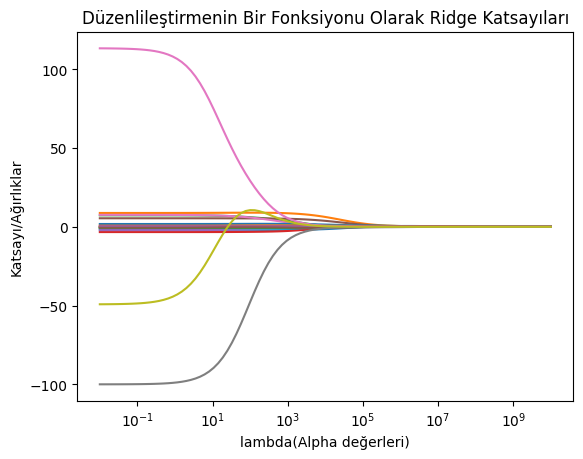

In [ ]:
lambdalar = 10**np.linspace(10,-2,100)*0.5

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train)
    katsayilar.append(ridge_model.coef_)


ax= plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale("log")

plt.xlabel("lambda(Alpha değerleri)")
plt.ylabel("Katsayı/Ağırlıklar")
plt.title("Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları")

In [ ]:
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))


357.05179222828446

In [ ]:
lambdalar = 10**np.linspace(10,-2,100)*0.5
lambdalar[0:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [ ]:

ridge_cv = RidgeCV(alphas = lambdalar,
                   scoring= "neg_mean_squared_error",
                   normalizer = True)
#Hata scikit learn kütüphanesinden kaynaklanmakta ?hatayı bul

TypeError: ignored

In [ ]:
ridge_cv.fit()

NameError: ignored